# Gravity signal model

The purpose of this script is to estimate the signal detected by a differential gravity sensor (gravity gradiometer) for a given ground mass distribution and at a given altitude. The model is structured as follows:

- Libraries and basic functions
- Space and mass map creation
- calculation of signal from single sensors
- gravity maps and gravity gradient map

In [1]:
#generate a space plane
#populate it with 1+objects
#generate a function of the gravity signal generated by that object as measured at a given distance

import math
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker
#import cython
from numba import autojit
from pylab import imshow, show
from timeit import default_timer as timer
#start = timer()
#dt = timer() - start

Constants and parameters initialisation

In [ ]:
#cdef int Gconst
Gconst = 6.67408 *10**(-11) #N⋅m2/kg2
densitydiff=1  # a parameter adjusting contrast between features.
angle=1
r =1

bias = 3*10**(-6) #earth's contribution 3000 E
l = 10 # factor between matrix element and real size, km
elev = 5 # matrix element height, important for the absolute quantities measured

Gmeas= 0
#Gmeas_map= #make matrix of gravity contributions

esd= 3000 # density of earth's surface, kg per cubic metre

Satellite reference x,y positions and altitude

In [14]:
#satellite location
xs = 50
ys = 50
altitude = 200 # in km

## Space and mass map creation

x and y define the size of the created space. A meshgrid is then created and is used as a base for the mass map. Alternatively a map can be imported in a suitable format. Tools for map generation and importation are under development.

In [ ]:
x=np.arange(0,701,1)
y=np.arange(0,701,1)
X,Y = np.meshgrid(x,y)

Fast generation of sample mass maps (flat, random). To be used alternatively to each other.

In [2]:
## flat map of ones of a given shape
map_shape=np.random.randn(len(X),len(Y))
dmap=np.ones_like(map_shape)

In [5]:
## random mass distribution
dmap=np.random.randn(len(X),len(Y)) # creating a table of random mass distribution, mean is 0, st dev 1

In [4]:
# mass map builder - empty map
map_shape=np.random.randn(len(X),len(Y))
dmap=np.zeros_like(map_shape)


From density map to proper mass map, depending on the parameters stated. Definition of satellite positions.

In [6]:
massmap = dmap * l**2 *elev*esd
Gmeas_map = massmap

#definition of satellite positions
x_range=np.arange(xs-5,xs+6,1)
y_range=np.arange(xs-5,xs+6,1)

G_meas_survey=np.random.randn(len(x_range),len(y_range))

In [7]:
start = timer()

for x_scan in range(len(x_range)):
    for y_scan in range(len(y_range)):
        xs=x_range[x_scan]
        ys=y_range[y_scan]
        Gmeas=0

#calculating distance point-satellite, angle
        for i in range(len(X)):
            for j in range(len(Y)):
                ground_dist = math.sqrt(abs(i-xs)**2 + abs(j-ys)**2) * l
                r = math.sqrt(altitude**2 + ground_dist**2)
                angle = math.atan(ground_dist/altitude)
                mass = massmap[i,j]
                g_obj=math.cos(angle)*Gconst*mass/r**2 #to be verified
                #Gmeas_map[i,j]=g_obj
                Gmeas += g_obj
        G_meas_survey[x_scan,y_scan]=Gmeas
                
        
    
#dg=2*Gconst*densitydiff*math.cos(angle)*r #gravity generated by object
#g_obj=Gconst*mass/r**2
print("Measurement = " + str(Gmeas))

# ---- lines to be de-commented is Gmeas_map is to be plotted.
#fig, ax = plt.subplots()
#cs = ax.contourf(X, Y, Gmeas_map, cmap=cm.magma)
#cbar = fig.colorbar(cs)
#plt.show()

dt = timer() - start
print("Signal n1 created in %f s" % dt)

Measurement = -4.03480957604e-08
Signal n1 created in 473.598612 s


In [8]:
## Second sensor

baseline = 0.001 #km
G_meas_survey_ss=np.random.randn(len(x_range),len(y_range))

altitude_ss = altitude+baseline
start = timer()
for x_scan in range(len(x_range)):
    for y_scan in range(len(y_range)):
        xs=x_range[x_scan]
        ys=y_range[y_scan]
        Gmeas_ss=0

#calculating distance point-satellite, angle
        for i in range(len(X)):
            for j in range(len(Y)):
                ground_dist = math.sqrt(abs(i-xs)**2 + abs(j-ys)**2) * l
                r = math.sqrt(altitude_ss**2 + ground_dist**2)
                angle = math.atan(ground_dist/altitude_ss)
                mass = massmap[i,j]
                g_obj=math.cos(angle)*Gconst*mass/r**2 #to be verified
                #Gmeas_map[i,j]=g_obj
                Gmeas_ss += g_obj
        G_meas_survey_ss[x_scan,y_scan]=Gmeas_ss
        
dt = timer() - start
print("Signal n2 created in %f s" % dt)

Signal n2 created in 418.950666 s


In [9]:
## Gradient map

Grad_map = (G_meas_survey - G_meas_survey_ss)/baseline

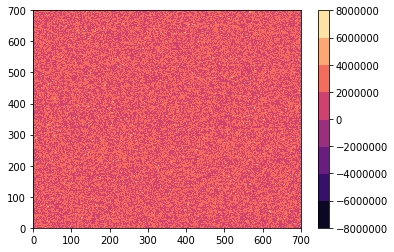

In [10]:
#--- Plotting the massmap
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, massmap, cmap=cm.magma)
cbar = fig.colorbar(cs)
plt.show()

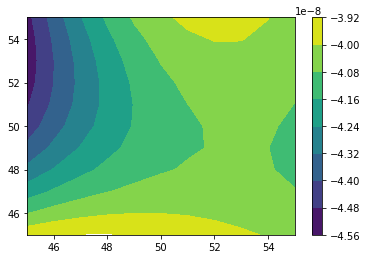

In [11]:
## first sensor measurement

fig, ax = plt.subplots()
cs = ax.contourf(x_range, y_range, G_meas_survey)
cbar = fig.colorbar(cs)
plt.show()

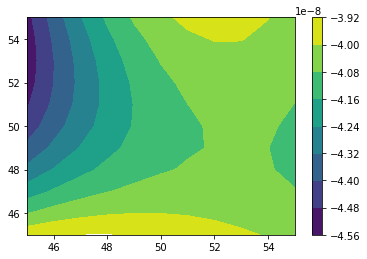

In [12]:
## second sensor measurement

fig, ax = plt.subplots()
cs = ax.contourf(x_range, y_range, G_meas_survey_ss)
cbar = fig.colorbar(cs)
plt.show()

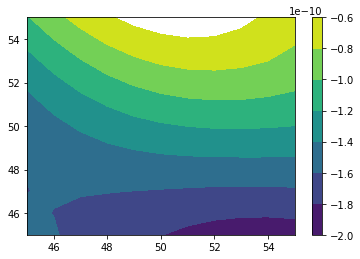

In [13]:
## gradient measurement

fig, ax = plt.subplots()
cs = ax.contourf(x_range, y_range, Grad_map)
cbar = fig.colorbar(cs)
plt.show()